<a href="https://colab.research.google.com/github/BadGe-D/DATN/blob/main/ClassifierRoadAhead.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from time import time
from numpy import array

In [3]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import os

# Assuming your CSV file is in the mounted drive
file_path = '/content/drive/MyDrive/DATN/dataset/BinClassData_cleaned.csv'  # Replace 'your_file.csv' with the actual file name and path
image_path = '/content/drive/MyDrive/DATN/dataset/'

try:
    df = pd.read_csv(file_path)
    df['CanHeadToward'] = df['CanHeadToward'].replace({'yes': 1, 'no': 0})

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        df['image'], df['CanHeadToward'], test_size=0.2, random_state=42
    )

    # Prepare image data for training and testing
    X_train_images = []
    for image_name in X_train:
      try:
          img = Image.open(os.path.join(image_path, image_name))
          img = img.resize((224,224)) # Resize images to fit ResNet input
          X_train_images.append(np.array(img))
      except FileNotFoundError:
          print(f"Warning: Image file not found: {image_name}")
          # Handle missing image - you might want to remove the corresponding entry from y_train or replace it with a default image
          # Here, we're simply skipping the image.

    X_test_images = []
    for image_name in X_test:
      try:
          img = Image.open(os.path.join(image_path, image_name))
          img = img.resize((224,224))  # Resize images
          X_test_images.append(np.array(img))
      except FileNotFoundError:
          print(f"Warning: Image file not found: {image_name}")
          # Handle missing image similarly to the training set

    # Convert lists to numpy arrays
    X_train_images = np.array(X_train_images)
    X_test_images = np.array(X_test_images)
    y_train = np.array(y_train)
    y_test = np.array(y_test)


    print("X_train shape:", X_train_images.shape)
    print("y_train shape:", y_train.shape)
    print("X_test shape:", X_test_images.shape)
    print("y_test shape:", y_test.shape)

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except KeyError:
    print(f"Error: Column 'CanHeadToward' or 'image' not found in the CSV file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


<ipython-input-3-207025d04f64>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CanHeadToward'] = df['CanHeadToward'].replace({'yes': 1, 'no': 0})


X_train shape: (92, 224, 224, 3)
y_train shape: (92,)
X_test shape: (24, 224, 224, 3)
y_test shape: (24,)


In [10]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50 # Import ResNet18 after upgrading
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np

# Load pre-trained ResNet18 model (excluding the classification layer)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) # Adjust input_shape if needed

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x) # You can experiment with other pooling layers or flattening
x = Dense(1024, activation='relu')(x) # Adjust the number of units as needed
predictions = Dense(1, activation='sigmoid')(x) # Binary classification

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False
# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), # Adjust learning rate as needed
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Example usage (replace with your actual data loading):
# Assuming you have 'X_train' (images) and 'y_train' (labels)
# Images should be preprocessed (resized, normalized) to match the input shape of ResNet18
# X_train = ... # Your training images
# y_train = ... # Your training labels (0 or 1)


# Train only the newly added classifier layers
model.fit(X_train_images, y_train, epochs=30, batch_size=16) # Adjust epochs and batch size


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 781ms/step - accuracy: 0.6529 - loss: 1.6839
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7795 - loss: 0.7744
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8528 - loss: 0.3994
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9553 - loss: 0.1388
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9831 - loss: 0.0925
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9929 - loss: 0.0435
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.0407
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 0.0305
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 0.0129
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.0103
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 0.0081
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.0062

Test Loss: 0.1311
Test Accuracy: 0.9583
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.95      0.98        22

    accuracy                           0.96        24
   macro avg       0.83      0.98      0.89        24
weighted avg       0.97      0.96      0.96        24



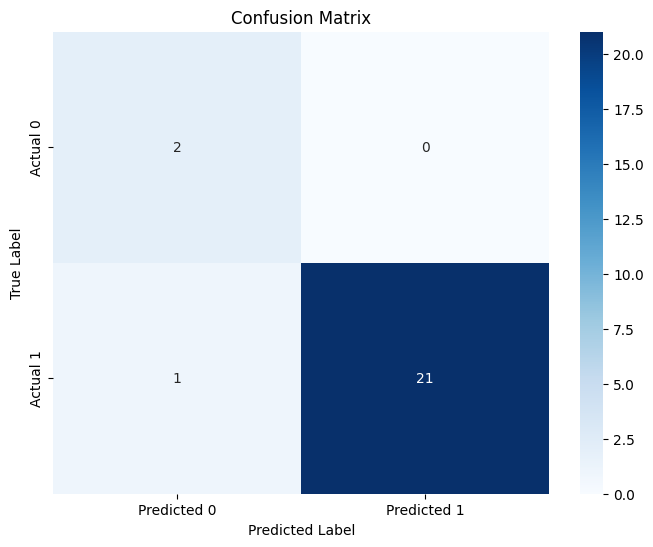

In [11]:

import matplotlib.pyplot as plt
# Evaluate the model
loss, accuracy = model.evaluate(X_test_images, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

#Further analysis (optional)
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test_images)
y_pred_classes = (y_pred > 0.5).astype(int) # Convert probabilities to class labels

print(classification_report(y_test, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [12]:
# Save the entire model
model_save_path = '/content/drive/MyDrive/DATN/ClassifierModel.keras' #Change the path if you want
model.save(model_save_path)
print(f"Model saved to: {model_save_path}")

Model saved to: /content/drive/MyDrive/DATN/ClassifierModel.keras


In [15]:

import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the saved model
model_save_path = '/content/drive/MyDrive/DATN/ClassifierModel.keras'
model = tf.keras.models.load_model(model_save_path)

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print("class 1")
  else:
    print("class 0")


Saving every-single-one-of-these-cars-blocking-the-sidewalk-is-v0-ydwb5k9ba75d1.png to every-single-one-of-these-cars-blocking-the-sidewalk-is-v0-ydwb5k9ba75d1.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[0.99883586]
class 1
